## **GETTING STARTED**

In [ ]:
!python --version
!pip show spotipy
!pip install spotipy

Python 3.7.15
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 17.7 MB/s 
     |████████████████████████████████| 246 kB 64.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## **AUTHORIZATION TO SPOTIFY API**

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

SPOTIPY_CLIENT_ID='a9c08768bf6f4d5083cdafbbf17c2277'
SPOTIPY_CLIENT_SECRET='445ef713ee2b40d19c9c5d178f6b2380'

In [ ]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
sp.me

<bound method Spotify.me of <spotipy.client.Spotify object at 0x7f7dccd0b750>>

## **SEARCHING FOR ALBUMS**

In [ ]:
albums = sp.search(q='album:'+'justice',type='album', limit=20)

In [ ]:
len(albums['albums']['items'])

20

In [ ]:
albums['albums']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1uNFoZAHBGtllmzznpCI3s'},
  'href': 'https://api.spotify.com/v1/artists/1uNFoZAHBGtllmzznpCI3s',
  'id': '1uNFoZAHBGtllmzznpCI3s',
  'name': 'Justin Bieber',
  'type': 'artist',
  'uri': 'spotify:artist:1uNFoZAHBGtllmzznpCI3s'}]

In [ ]:
albums['albums']['items'][0]['artists'][0]['name']

'Justin Bieber'

In [ ]:
for i in range(20):
  print(albums['albums']['items'][i])

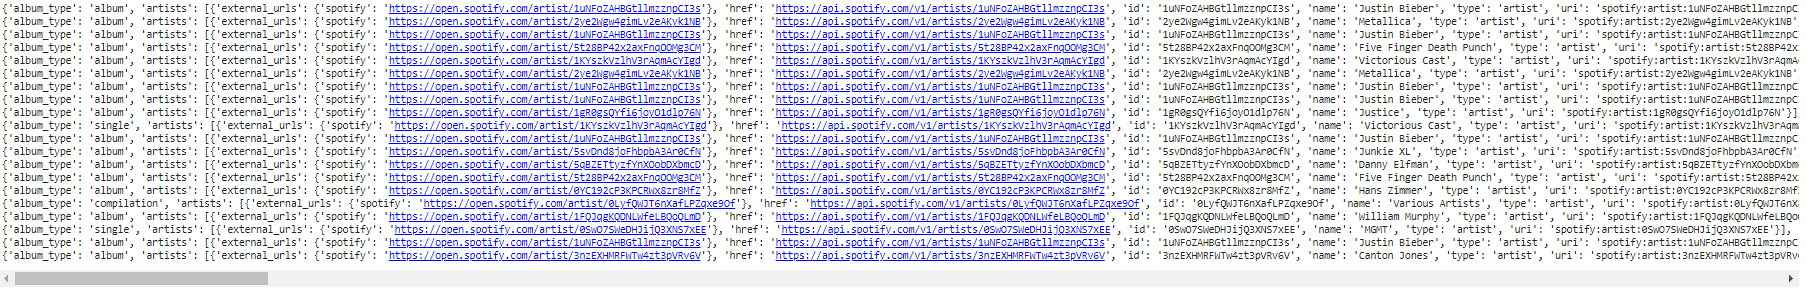


In [ ]:
for i in range(20):
  print(albums['albums']['items'][i]['artists'][0]['name'])

Justin Bieber
Metallica
Justin Bieber
Five Finger Death Punch
Victorious Cast
Metallica
Justin Bieber
Justin Bieber
Justice
Victorious Cast
Justin Bieber
Junkie XL
Danny Elfman
Five Finger Death Punch
Hans Zimmer
Various Artists
William Murphy
MGMT
Justin Bieber
Canton Jones


## **SEARCHING FOR TRACKS**

In [ ]:
tracks = sp.search(q='track:' + 'Ghost', type='track', limit = 20)

In [ ]:
len(tracks['tracks']['items'])

20

In [ ]:
tracks['tracks']['items'][0]

In [ ]:
for i in range(20):
  print(tracks['tracks']['items'][i])

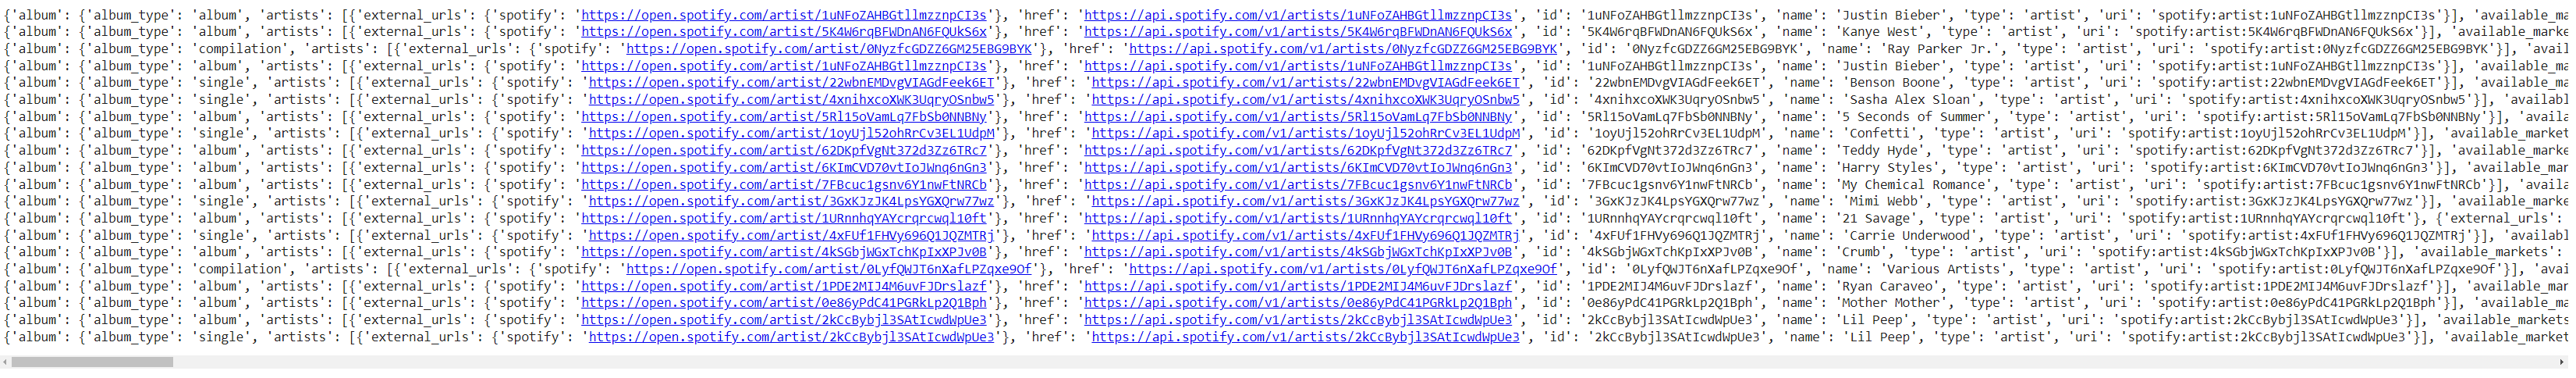


In [ ]:
for i in range(20):
  print(tracks['tracks']['items'][i]['artists'])

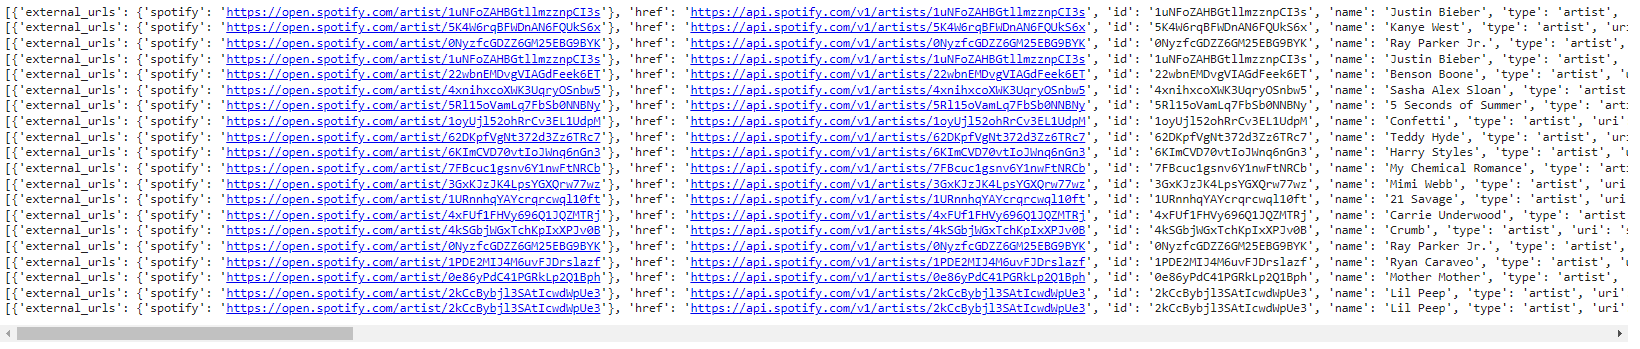


In [ ]:
for i in range(20):
  print(tracks['tracks']['items'][i]['artists'][0]['name'])

Justin Bieber
Kanye West
Ray Parker Jr.
Justin Bieber
Benson Boone
Sasha Alex Sloan
5 Seconds of Summer
Confetti
Teddy Hyde
Harry Styles
My Chemical Romance
Mimi Webb
21 Savage
Carrie Underwood
Crumb
Ray Parker Jr.
Ryan Caraveo
Mother Mother
Lil Peep
Lil Peep


In [ ]:
if len(tracks['tracks']['items']) > 0:
  for item in tracks['tracks']['items']:
    print(f"Track Name: {item['name']}  ||  Author: {item['artists'][0]['name']}")
    print(f"Track ID: {item['id']}  ||  Author ID - {item['artists'][0]['id']}")
    print('--------------------------------------------------------------------------------------')

Track Name: Ghost  ||  Author: Justin Bieber
Track ID: 6I3mqTwhRpn34SLVafSH7G  ||  Author ID - 1uNFoZAHBGtllmzznpCI3s
--------------------------------------------------------------------------------------
Track Name: Ghost Town  ||  Author: Kanye West
Track ID: 7vgTNTaEz3CsBZ1N4YQalM  ||  Author ID - 5K4W6rqBFWDnAN6FQUkS6x
--------------------------------------------------------------------------------------
Track Name: Ghostbusters  ||  Author: Ray Parker Jr.
Track ID: 569uHYIB0X324FZOBEhvit  ||  Author ID - 0NyzfcGDZZ6GM25EBG9BYK
--------------------------------------------------------------------------------------
Track Name: Ghost  ||  Author: Justin Bieber
Track ID: 5dPz35akJjPqb17yeqNwqH  ||  Author ID - 1uNFoZAHBGtllmzznpCI3s
--------------------------------------------------------------------------------------
Track Name: GHOST TOWN  ||  Author: Benson Boone
Track ID: 135Lf4Q0CzlMNfOxbEUsLH  ||  Author ID - 22wbnEMDvgVIAGdFeek6ET
------------------------------------------------

## **Audio Features Augmentation**

**Impactful Audio Feautures to Include:**


*  *Acousticness*
>* The confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.

*  *Danceability*
>* Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

*  *Song Energy*
>* Song energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

*  *Instrumentalness*
>* Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

*  *Liveness*
>* Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

*  *Loudness*
>* The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

*  *Speechiness*
>* Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

*  *Valence*
>* A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [ ]:
track_audio_specs  = sp.audio_features('3yfqSUWxFvZELEM4PmlwIR')

In [ ]:
track_audio_specs

[{'danceability': 0.949,
  'energy': 0.661,
  'key': 5,
  'loudness': -4.244,
  'mode': 0,
  'speechiness': 0.0572,
  'acousticness': 0.0302,
  'instrumentalness': 0,
  'liveness': 0.0454,
  'valence': 0.76,
  'tempo': 104.504,
  'type': 'audio_features',
  'id': '3yfqSUWxFvZELEM4PmlwIR',
  'uri': 'spotify:track:3yfqSUWxFvZELEM4PmlwIR',
  'track_href': 'https://api.spotify.com/v1/tracks/3yfqSUWxFvZELEM4PmlwIR',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3yfqSUWxFvZELEM4PmlwIR',
  'duration_ms': 284200,
  'time_signature': 4}]

In [ ]:
import pandas as pd 
df = pd.DataFrame(track_audio_specs, index=[0])
df_audio_specs = df.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

In [ ]:
df_audio_specs

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.949,0.661,0.0572,0.0302,0,0.0454,0.76


In [ ]:
from matplotlib.colorbar import Colorbar
import numpy as np
import matplotlib.pyplot as plt

def feature_plot(features):
    labels= list(features)[:]
    stats= features.mean().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig=plt.figure(figsize = (19,19), facecolor='w')

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=1.9, label = "Song Features", color= 'purple')
    ax.fill(angles, stats, alpha=0.25, facecolor='purple')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


    ax.set_rlabel_position(250)
    plt.yticks([0.25 , 0.5 , 0.75 , 1], ["0.25",'0.5', "0.75", "1"], color="black", size=13)
    plt.ylim(0,1)

    plt.legend(loc='best', bbox_to_anchor=(0.095, 0.095))

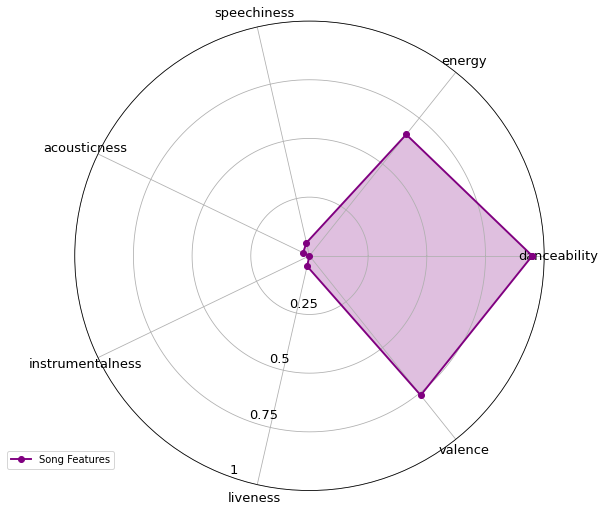

In [ ]:
feature_plot(df_audio_specs)

In [ ]:
def feature_plot2(features1,features2):
    #Import Libraries for Feature plot
    import numpy as np
    import matplotlib.pyplot as plt
    
    labels= list(features1)[:]
    stats= features1.mean().tolist()
    stats2 = features2.mean().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    stats2 =np.concatenate((stats2,[stats2[0]])) 
    angles=np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig=plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label = "Features 1", color= 'gray')
    ax.fill(angles, stats, alpha=0.25, facecolor='blue')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.25 , 0.5 , 0.75 , 1], ["0.25",'0.5', "0.75", "1"], color="grey", size=13)
    plt.ylim(0,1)

    ax.plot(angles, stats2, 'o-', linewidth=2, label = "Features 2", color = 'm')
    ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)

    plt.legend(loc='best', bbox_to_anchor=(0.095, 0.095))

In [ ]:
track_audio_specs2  = sp.audio_features('3j3XiRDNkaUfINMB99hphS')
df2 = pd.DataFrame(track_audio_specs2, index=[0])
df_audio_specs2 = df2.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

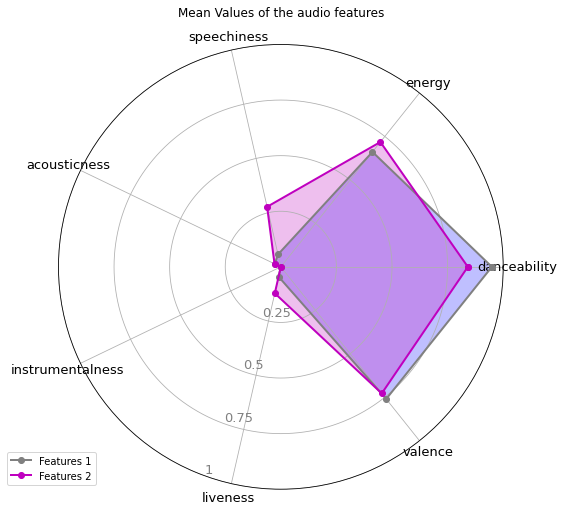

In [ ]:
feature_plot2(df_audio_specs,df_audio_specs2)

In [ ]:
if len(tracks['tracks']['items']) > 0:
  for item in tracks['tracks']['items']:   
    print(item['id'])

6I3mqTwhRpn34SLVafSH7G
7vgTNTaEz3CsBZ1N4YQalM
569uHYIB0X324FZOBEhvit
5dPz35akJjPqb17yeqNwqH
135Lf4Q0CzlMNfOxbEUsLH
1TQXIltqoZ5XXyfCbAeSQQ
1MhXdlCQPnO56T57MfmaRm
30uCmqegKQnH5AbOE51gPD
1Y2583xYzwiEXDetAB7H1Q
4B1rpPmQXwj78wk6aIGwwU
1yKAqZoi8xWGLCf5vajroL
7Kbw2fTMOU43MrqXdGzroh
5u6vkDnOyaf8LsteDAj2ub
2FGOg7uYBfnspkPOISXTFY
0R3TWpoxAhT3HDXM7tpRzS
3m0y8qLoznUYi73SUBP8GI
7CHMY5TN1e8oqDnRwwJR61
3vZUC1m6QVm7urnN6lcF64
5LAVhynnTmj9VJjW8xGZdP
4AiFSXnVm0Bqecjdn3Brr8


In [ ]:
track_audio_specs3  = sp.audio_features('3yfqSUWxFvZELEM4PmlwIR')
df3 = pd.DataFrame(track_audio_specs3, index=[0])
df_audio_specs3 = df3.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

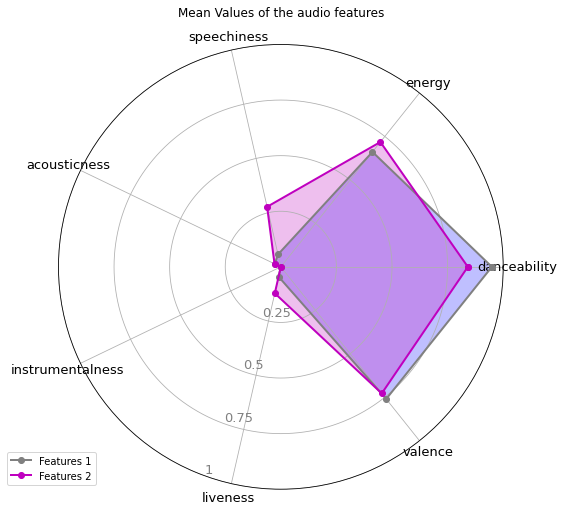

In [ ]:
feature_plot2(df_audio_specs,df_audio_specs2)

In [ ]:
lst = []
if len(tracks['tracks']['items']) > 0:
  for item in tracks['tracks']['items']:   
    track_audio_specs  = sp.audio_features(item['id'])
    lst.append(track_audio_specs)

lst

## **GENERATING TOKEN FOR RECOMMENDATION**

In [ ]:
import requests
import base64

def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [ ]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)

In [ ]:
token

'BQD8WskvkkEPcnmMHAQnolK_2vS5wD6xmKpK7OipI-aJjnLceSzmkhV10fYun_VcxL7G8HgdaiW26f27yucUk8I7doh1150TMspc9QBo8m--gJTtbxA'

## **GETTING RECOMMENDATION BASED ON SONG**

In [ ]:
def get_track_recommendations(seed_tracks,token):
    limit = 100
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [ ]:
track_id = '6I3mqTwhRpn34SLVafSH7G'
json_response = get_track_recommendations(track_id,token)

In [ ]:
json_response

In [ ]:
recc_track_result = []
for i, item in enumerate(json_response['tracks']):
    track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    explicit = item['explicit']
    duration = ((item['duration_ms']/1000)/60)
    preview_url = item['preview_url']
    recc_track_result.append((i, track['artists'][0]['name'], track['name'], track_id, track_name, track['release_date'], popularity, explicit, duration, preview_url))

In [ ]:
recc_track_result

In [ ]:
import pandas as pd
recc_track_result_df = pd.DataFrame(recc_track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity','Explicit','Duration_mins','Preview_url'))

audio_features_df = pd.DataFrame()
for id in recc_track_result_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    audio_features_df = audio_features_df.append(local_features)

In [ ]:
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.592,0.342,0,-8.930,1,0.0339,0.193000,0.002450,0.1100,0.155,130.953,audio_features,4cGqn0E8JCSY9gQllQj4Mf,spotify:track:4cGqn0E8JCSY9gQllQj4Mf,https://api.spotify.com/v1/tracks/4cGqn0E8JCSY...,https://api.spotify.com/v1/audio-analysis/4cGq...,241595,4
0,0.721,0.745,7,-3.508,0,0.0366,0.151000,0.000001,0.3720,0.699,90.988,audio_features,6FuGJB290AQMAHTfjOYVaK,spotify:track:6FuGJB290AQMAHTfjOYVaK,https://api.spotify.com/v1/tracks/6FuGJB290AQM...,https://api.spotify.com/v1/audio-analysis/6FuG...,192745,4
0,0.583,0.670,8,-7.289,1,0.0646,0.037400,0.000100,0.1260,0.498,140.061,audio_features,1Ov37jtRQ2YNAe8HzfczkL,spotify:track:1Ov37jtRQ2YNAe8HzfczkL,https://api.spotify.com/v1/tracks/1Ov37jtRQ2YN...,https://api.spotify.com/v1/audio-analysis/1Ov3...,220433,4
0,0.602,0.626,2,-5.323,0,0.0396,0.012900,0.000009,0.1440,0.619,160.118,audio_features,7l9IqDtVWJurTvkQHq1BGh,spotify:track:7l9IqDtVWJurTvkQHq1BGh,https://api.spotify.com/v1/tracks/7l9IqDtVWJur...,https://api.spotify.com/v1/audio-analysis/7l9I...,207120,4
0,0.386,0.426,3,-6.642,1,0.0363,0.807000,0.000000,0.1400,0.261,180.104,audio_features,5ajjAnNRh8bxFvaVHzpPjh,spotify:track:5ajjAnNRh8bxFvaVHzpPjh,https://api.spotify.com/v1/tracks/5ajjAnNRh8bx...,https://api.spotify.com/v1/audio-analysis/5ajj...,203385,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.599,0.866,10,-2.808,1,0.0629,0.359000,0.000000,0.1070,0.391,147.934,audio_features,4sxssJY6nbqDHnsgZPkRZW,spotify:track:4sxssJY6nbqDHnsgZPkRZW,https://api.spotify.com/v1/tracks/4sxssJY6nbqD...,https://api.spotify.com/v1/audio-analysis/4sxs...,219453,4
0,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,audio_features,5Odq8ohlgIbQKMZivbWkEo,spotify:track:5Odq8ohlgIbQKMZivbWkEo,https://api.spotify.com/v1/tracks/5Odq8ohlgIbQ...,https://api.spotify.com/v1/audio-analysis/5Odq...,154487,4
0,0.673,0.729,0,-5.664,1,0.0290,0.000983,0.000107,0.2260,0.482,112.535,audio_features,2wJ1eOCIBwoQiN7xQtrTAY,spotify:track:2wJ1eOCIBwoQiN7xQtrTAY,https://api.spotify.com/v1/tracks/2wJ1eOCIBwoQ...,https://api.spotify.com/v1/audio-analysis/2wJ1...,233588,4
0,0.717,0.734,5,-5.712,1,0.0426,0.280000,0.000101,0.1470,0.894,91.014,audio_features,7dTd00X8Mc5iErfQQyBA6B,spotify:track:7dTd00X8Mc5iErfQQyBA6B,https://api.spotify.com/v1/tracks/7dTd00X8Mc5i...,https://api.spotify.com/v1/audio-analysis/7dTd...,171360,4


In [ ]:
our_final_df = recc_track_result_df.merge(audio_features_df, left_on="Id", right_on="id")
our_final_df

,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity,Explicit,Duration_mins,Preview_url,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Coldplay,Music Of The Spheres,4cGqn0E8JCSY9gQllQj4Mf,Let Somebody Go,2021-10-15,78,False,4.026583,https://p.scdn.co/mp3-preview/7f7024b0a66ce53e...,...,0.1100,0.155,130.953,audio_features,4cGqn0E8JCSY9gQllQj4Mf,spotify:track:4cGqn0E8JCSY9gQllQj4Mf,https://api.spotify.com/v1/tracks/4cGqn0E8JCSY...,https://api.spotify.com/v1/audio-analysis/4cGq...,241595,4
1,1,24kGoldn,"Mood (Remix) feat. Justin Bieber, J Balvin & i...",6FuGJB290AQMAHTfjOYVaK,"Mood (Remix) feat. Justin Bieber, J Balvin & i...",2020-11-06,70,True,3.212417,https://p.scdn.co/mp3-preview/0e4989080f7d1792...,...,0.3720,0.699,90.988,audio_features,6FuGJB290AQMAHTfjOYVaK,spotify:track:6FuGJB290AQMAHTfjOYVaK,https://api.spotify.com/v1/tracks/6FuGJB290AQM...,https://api.spotify.com/v1/audio-analysis/6FuG...,192745,4
2,2,Taylor Swift,Wildest Dreams (Taylor's Version),1Ov37jtRQ2YNAe8HzfczkL,Wildest Dreams (Taylor's Version),2021-09-17,82,False,3.673883,None,...,0.1260,0.498,140.061,audio_features,1Ov37jtRQ2YNAe8HzfczkL,spotify:track:1Ov37jtRQ2YNAe8HzfczkL,https://api.spotify.com/v1/tracks/1Ov37jtRQ2YN...,https://api.spotify.com/v1/audio-analysis/1Ov3...,220433,4
3,3,Tate McRae,i used to think i could fly,7l9IqDtVWJurTvkQHq1BGh,she's all i wanna be,2022-05-27,75,False,3.452000,https://p.scdn.co/mp3-preview/39af9db8e9500261...,...,0.1440,0.619,160.118,audio_features,7l9IqDtVWJurTvkQHq1BGh,spotify:track:7l9IqDtVWJurTvkQHq1BGh,https://api.spotify.com/v1/tracks/7l9IqDtVWJur...,https://api.spotify.com/v1/audio-analysis/7l9I...,207120,4
4,4,Madison Beer,Reckless,5ajjAnNRh8bxFvaVHzpPjh,Reckless,2021-06-04,79,False,3.389733,https://p.scdn.co/mp3-preview/05db5423d117de44...,...,0.1400,0.261,180.104,audio_features,5ajjAnNRh8bxFvaVHzpPjh,spotify:track:5ajjAnNRh8bxFvaVHzpPjh,https://api.spotify.com/v1/tracks/5ajjAnNRh8bx...,https://api.spotify.com/v1/audio-analysis/5ajj...,203385,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Ruth B.,Safe Haven,4sxssJY6nbqDHnsgZPkRZW,Superficial Love - Single Version,2017-05-05,60,False,3.657550,https://p.scdn.co/mp3-preview/44201ea5af1c5201...,...,0.1070,0.391,147.934,audio_features,4sxssJY6nbqDHnsgZPkRZW,spotify:track:4sxssJY6nbqDHnsgZPkRZW,https://api.spotify.com/v1/tracks/4sxssJY6nbqD...,https://api.spotify.com/v1/audio-analysis/4sxs...,219453,4
96,96,Charlie Puth,CHARLIE,5Odq8ohlgIbQKMZivbWkEo,Left and Right (Feat. Jung Kook of BTS),2022-10-06,79,False,2.574767,https://p.scdn.co/mp3-preview/7b872d741e9af03f...,...,0.0901,0.719,101.058,audio_features,5Odq8ohlgIbQKMZivbWkEo,spotify:track:5Odq8ohlgIbQKMZivbWkEo,https://api.spotify.com/v1/tracks/5Odq8ohlgIbQ...,https://api.spotify.com/v1/audio-analysis/5Odq...,154487,4
97,97,Ruel,GROWING UP IS _____,2wJ1eOCIBwoQiN7xQtrTAY,GROWING UP IS _____,2021-12-08,66,False,3.893117,https://p.scdn.co/mp3-preview/5d9c6f93e5f082db...,...,0.2260,0.482,112.535,audio_features,2wJ1eOCIBwoQiN7xQtrTAY,spotify:track:2wJ1eOCIBwoQiN7xQtrTAY,https://api.spotify.com/v1/tracks/2wJ1eOCIBwoQ...,https://api.spotify.com/v1/audio-analysis/2wJ1...,233588,4
98,98,The Chainsmokers,So Far So Good,7dTd00X8Mc5iErfQQyBA6B,Riptide,2022-06-08,64,False,2.855983,https://p.scdn.co/mp3-preview/1d354a934fdc5c34...,...,0.1470,0.894,91.014,audio_features,7dTd00X8Mc5iErfQQyBA6B,spotify:track:7dTd00X8Mc5iErfQQyBA6B,https://api.spotify.com/v1/tracks/7dTd00X8Mc5i...,https://api.spotify.com/v1/audio-analysis/7dTd...,171360,4


In [ ]:
our_final_df.Popularity.value_counts(bins=5)

(57.8, 68.2]      34
(68.2, 78.6]      25
(47.4, 57.8]      17
(78.6, 89.0]      15
(36.947, 47.4]     9
Name: Popularity, dtype: int64

In [ ]:
our_final_df.dtypes

Item                  int64
Artist               object
Album Name           object
Id                   object
Song Name            object
Release Date         object
Popularity            int64
Explicit               bool
Duration_mins       float64
Preview_url          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [ ]:
our_final_df.columns

Index(['Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date',
       'Popularity', 'Explicit', 'Duration_mins', 'Preview_url',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [ ]:
import seaborn as sns

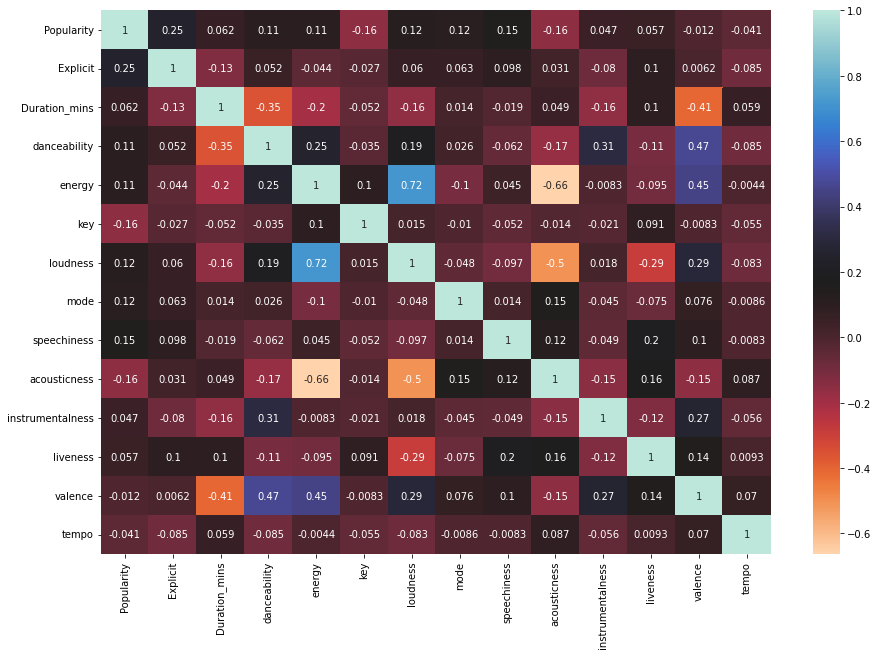

In [ ]:
corr = our_final_df[['Release Date', 'Popularity', 'Explicit', 'Duration_mins', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="icefire_r") # copper_r, icefire,icefire_r

In [ ]:
our_final_df

,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity,Explicit,Duration_mins,Preview_url,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Coldplay,Music Of The Spheres,4cGqn0E8JCSY9gQllQj4Mf,Let Somebody Go,2021-10-15,78,False,4.026583,https://p.scdn.co/mp3-preview/7f7024b0a66ce53e...,...,0.1100,0.155,130.953,audio_features,4cGqn0E8JCSY9gQllQj4Mf,spotify:track:4cGqn0E8JCSY9gQllQj4Mf,https://api.spotify.com/v1/tracks/4cGqn0E8JCSY...,https://api.spotify.com/v1/audio-analysis/4cGq...,241595,4
1,1,24kGoldn,"Mood (Remix) feat. Justin Bieber, J Balvin & i...",6FuGJB290AQMAHTfjOYVaK,"Mood (Remix) feat. Justin Bieber, J Balvin & i...",2020-11-06,70,True,3.212417,https://p.scdn.co/mp3-preview/0e4989080f7d1792...,...,0.3720,0.699,90.988,audio_features,6FuGJB290AQMAHTfjOYVaK,spotify:track:6FuGJB290AQMAHTfjOYVaK,https://api.spotify.com/v1/tracks/6FuGJB290AQM...,https://api.spotify.com/v1/audio-analysis/6FuG...,192745,4
2,2,Taylor Swift,Wildest Dreams (Taylor's Version),1Ov37jtRQ2YNAe8HzfczkL,Wildest Dreams (Taylor's Version),2021-09-17,82,False,3.673883,None,...,0.1260,0.498,140.061,audio_features,1Ov37jtRQ2YNAe8HzfczkL,spotify:track:1Ov37jtRQ2YNAe8HzfczkL,https://api.spotify.com/v1/tracks/1Ov37jtRQ2YN...,https://api.spotify.com/v1/audio-analysis/1Ov3...,220433,4
3,3,Tate McRae,i used to think i could fly,7l9IqDtVWJurTvkQHq1BGh,she's all i wanna be,2022-05-27,75,False,3.452000,https://p.scdn.co/mp3-preview/39af9db8e9500261...,...,0.1440,0.619,160.118,audio_features,7l9IqDtVWJurTvkQHq1BGh,spotify:track:7l9IqDtVWJurTvkQHq1BGh,https://api.spotify.com/v1/tracks/7l9IqDtVWJur...,https://api.spotify.com/v1/audio-analysis/7l9I...,207120,4
4,4,Madison Beer,Reckless,5ajjAnNRh8bxFvaVHzpPjh,Reckless,2021-06-04,79,False,3.389733,https://p.scdn.co/mp3-preview/05db5423d117de44...,...,0.1400,0.261,180.104,audio_features,5ajjAnNRh8bxFvaVHzpPjh,spotify:track:5ajjAnNRh8bxFvaVHzpPjh,https://api.spotify.com/v1/tracks/5ajjAnNRh8bx...,https://api.spotify.com/v1/audio-analysis/5ajj...,203385,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Ruth B.,Safe Haven,4sxssJY6nbqDHnsgZPkRZW,Superficial Love - Single Version,2017-05-05,60,False,3.657550,https://p.scdn.co/mp3-preview/44201ea5af1c5201...,...,0.1070,0.391,147.934,audio_features,4sxssJY6nbqDHnsgZPkRZW,spotify:track:4sxssJY6nbqDHnsgZPkRZW,https://api.spotify.com/v1/tracks/4sxssJY6nbqD...,https://api.spotify.com/v1/audio-analysis/4sxs...,219453,4
96,96,Charlie Puth,CHARLIE,5Odq8ohlgIbQKMZivbWkEo,Left and Right (Feat. Jung Kook of BTS),2022-10-06,79,False,2.574767,https://p.scdn.co/mp3-preview/7b872d741e9af03f...,...,0.0901,0.719,101.058,audio_features,5Odq8ohlgIbQKMZivbWkEo,spotify:track:5Odq8ohlgIbQKMZivbWkEo,https://api.spotify.com/v1/tracks/5Odq8ohlgIbQ...,https://api.spotify.com/v1/audio-analysis/5Odq...,154487,4
97,97,Ruel,GROWING UP IS _____,2wJ1eOCIBwoQiN7xQtrTAY,GROWING UP IS _____,2021-12-08,66,False,3.893117,https://p.scdn.co/mp3-preview/5d9c6f93e5f082db...,...,0.2260,0.482,112.535,audio_features,2wJ1eOCIBwoQiN7xQtrTAY,spotify:track:2wJ1eOCIBwoQiN7xQtrTAY,https://api.spotify.com/v1/tracks/2wJ1eOCIBwoQ...,https://api.spotify.com/v1/audio-analysis/2wJ1...,233588,4
98,98,The Chainsmokers,So Far So Good,7dTd00X8Mc5iErfQQyBA6B,Riptide,2022-06-08,64,False,2.855983,https://p.scdn.co/mp3-preview/1d354a934fdc5c34...,...,0.1470,0.894,91.014,audio_features,7dTd00X8Mc5iErfQQyBA6B,spotify:track:7dTd00X8Mc5iErfQQyBA6B,https://api.spotify.com/v1/tracks/7dTd00X8Mc5i...,https://api.spotify.com/v1/audio-analysis/7dTd...,171360,4


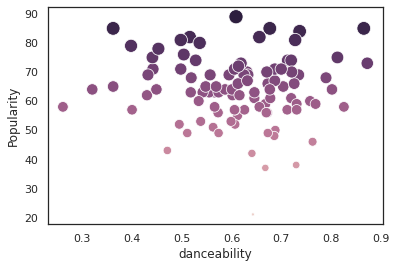

In [ ]:
sns.scatterplot(x = "danceability", 
                y = "Popularity", 
                data = our_final_df, size='Popularity', hue='Popularity', sizes=(10,200), legend=False)

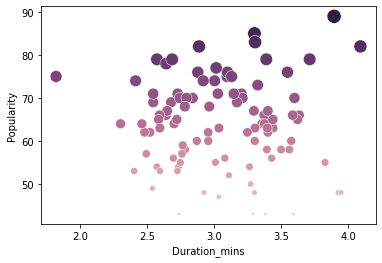

In [ ]:
sns.scatterplot(x = "Duration_mins", 
                y = "Popularity", 
                data = our_final_df, size='Popularity', hue='Popularity', sizes=(10,200), legend=False)

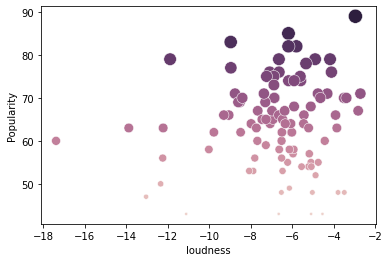

In [ ]:
sns.scatterplot(x = "loudness", 
                y = "Popularity", 
                data = our_final_df, size='Popularity', hue='Popularity', sizes=(10,200), legend=False)

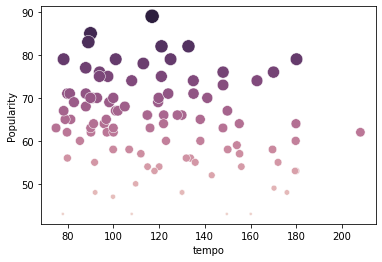

In [ ]:
sns.scatterplot(x = "tempo",
                y = "Popularity", 
                data = our_final_df, size='Popularity', hue='Popularity', sizes=(10,200), legend=False)

In [ ]:
sns.histplot(
    data=our_final_df, x="Duration_mins", y="Popularity",
    bins=25, discrete=(False, False), log_scale=(False, False), thresh=None,
)

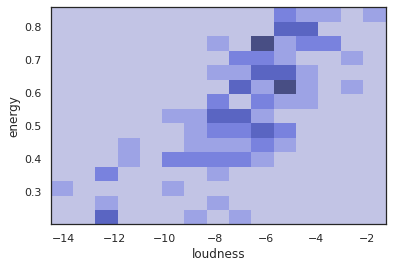

In [ ]:
sns.histplot(data=our_final_df, x="loudness", y="energy", bins=15, discrete=(False, False), log_scale=(False, False), thresh=None,color='#03051A')

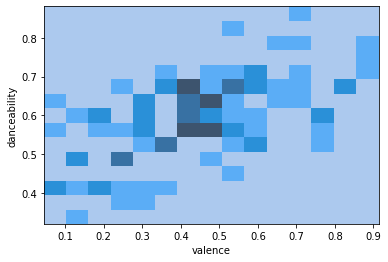

In [ ]:
sns.histplot(
    data=our_final_df, x="valence", y="danceability",
    bins=15, discrete=(False, False), log_scale=(False, False), thresh=None,
)

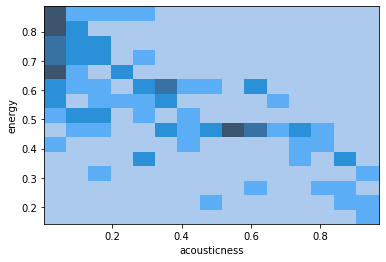

In [ ]:
sns.histplot(
    data=our_final_df, x="acousticness", y="energy",
    bins=15, discrete=(False, False), log_scale=(False, False), thresh=None,
)

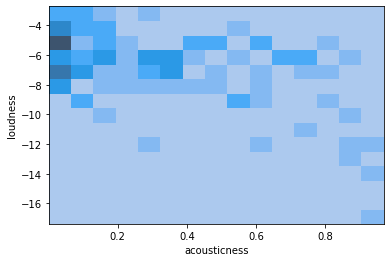

In [ ]:
sns.histplot(
    data=our_final_df, x="acousticness", y="loudness",
    bins=15, discrete=(False, False), log_scale=(False, False), thresh=None,
)

In [ ]:
import altair as alt

In [ ]:
sorted_df = our_final_df.sort_values(by=['Popularity'],ascending=False)

In [ ]:
alt.Chart(sorted_df).mark_circle().encode(
alt.X('Popularity', scale=alt.Scale(zero=False)), y='tempo', color=alt.Color('Popularity', scale=alt.Scale(zero=False)), 
size=alt.value(200), tooltip=['Popularity','tempo', 'Song Name', 'Album Name'])

alt.Chart(...)

In [ ]:
alt.Chart(sorted_df).mark_circle().encode(
alt.X('acousticness', scale=alt.Scale(zero=False)), y='loudness', color=alt.Color('Popularity', scale=alt.Scale(zero=False)), 
size=alt.value(200), tooltip=['Popularity','tempo', 'Song Name', 'Album Name'])

alt.Chart(...)

In [ ]:
alt.Chart(sorted_df).mark_circle().encode(
alt.X('danceability', scale=alt.Scale(zero=False)), y='valence', color=alt.Color('Popularity', scale=alt.Scale(zero=False)), 
size=alt.value(200), tooltip=['Popularity','tempo', 'Song Name', 'Album Name'])

alt.Chart(...)

In [ ]:
plt.figure(figsize = (125, 45))
sns.set(font_scale = 4)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])
plt.subplot(334)
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.subplot(335)

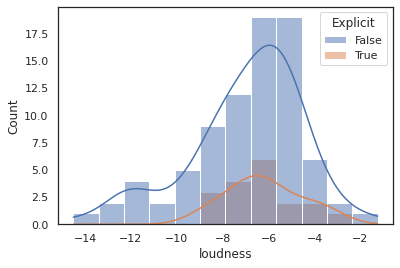

In [ ]:
sns.histplot(data=our_final_df, x="loudness",color='#03051A', hue="Explicit",kde = True)

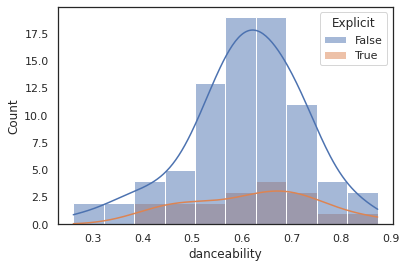

In [ ]:
sns.histplot(data=our_final_df, x="danceability", hue="Explicit",kde = True)

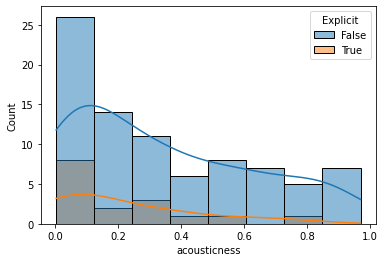

In [ ]:
sns.histplot(data=our_final_df, x="acousticness", hue="Explicit",kde = True)

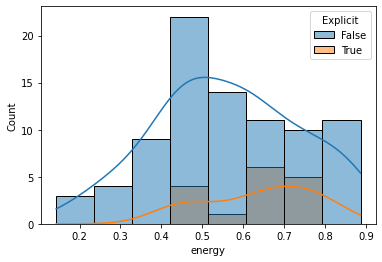

In [ ]:
sns.histplot(data=our_final_df, x="energy", hue="Explicit",kde = True)

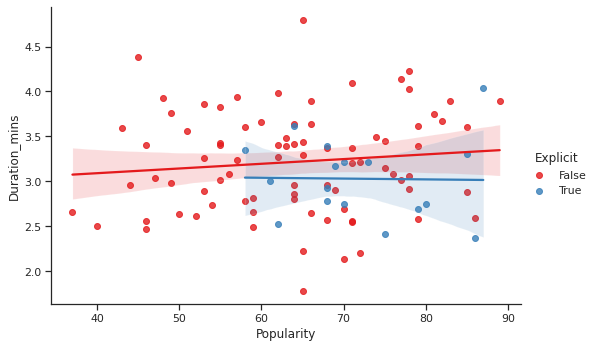

In [ ]:
sns.lmplot(x='Popularity',y='Duration_mins',data=our_final_df,hue='Explicit',palette='Set1', height=8, aspect=1.5, size=5)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


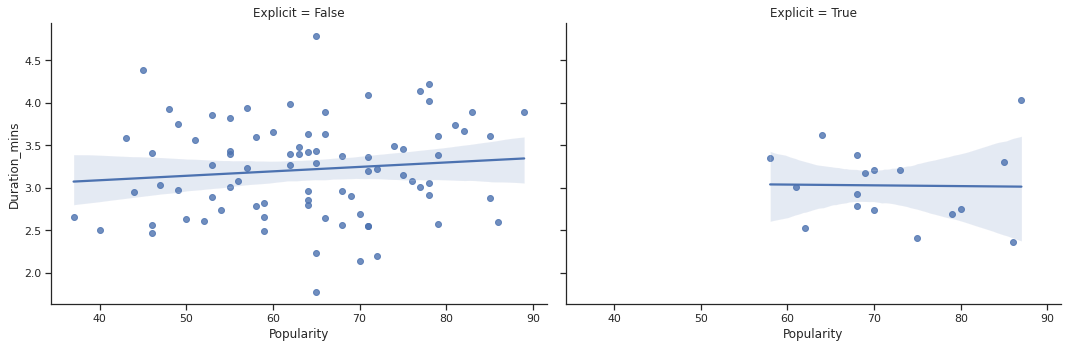

In [ ]:
sns.lmplot(x='Popularity',y='Duration_mins',data=our_final_df,col='Explicit',palette='Set1', height=8, aspect=1.5, size=5)

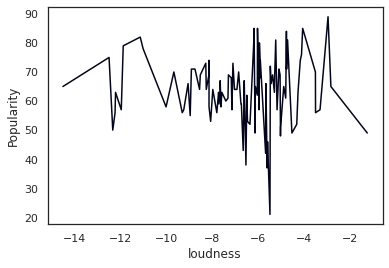

In [ ]:
sns.lineplot(data=our_final_df,x='loudness',y='Popularity',color='#03051A')

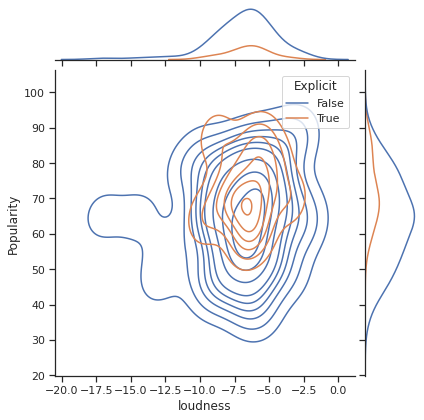

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=our_final_df,
    x="loudness", y="Popularity", hue="Explicit",
    kind="kde", color='#03051A'
)

In [ ]:
sns.jointplot(data=our_final_df, x="danceability", y="Popularity",kind="reg", color='#03051A')

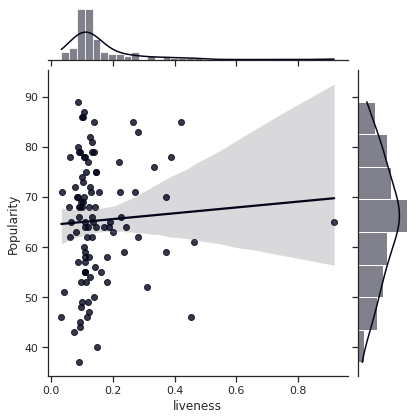

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=our_final_df,
    x="liveness", y="Popularity",
    kind="reg", color='#03051A'
)

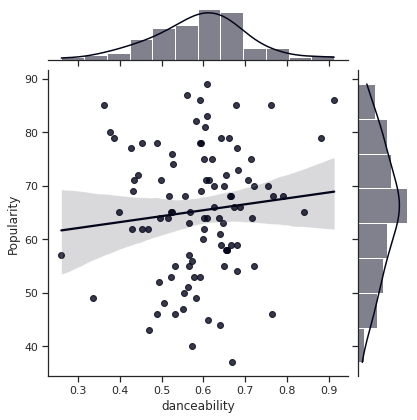

In [ ]:
sns.jointplot(data=our_final_df, x="danceability", y="Popularity",kind="reg", color='#03051A')

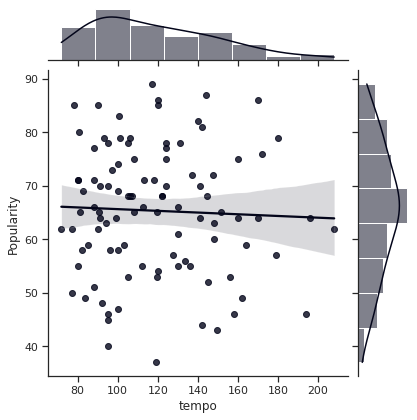

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=our_final_df,
    x="tempo", y="Popularity",
    kind="reg", color='#03051A'
)

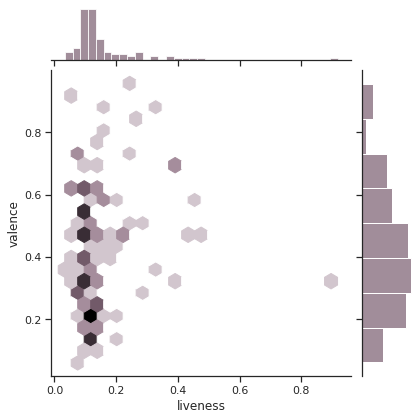

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.jointplot(data=our_final_df, x="liveness", y="valence", kind="hex", color='#826778')

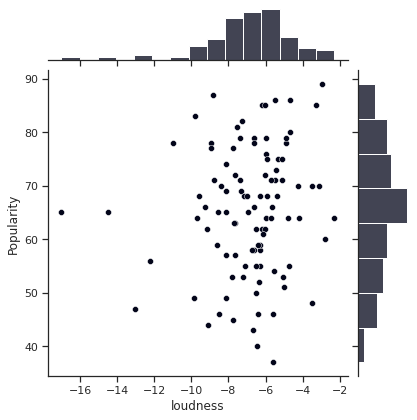

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=our_final_df,
    x="loudness", y="Popularity",
    kind="scatter", color='#03051A'
)

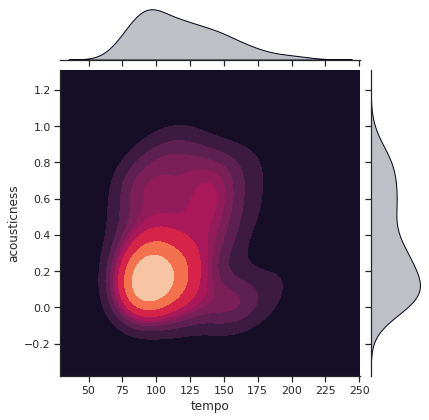

In [ ]:
g = sns.jointplot(
    data=our_final_df,
    x="tempo", y="acousticness",
    kind="kde", color='#03051A',cmap='rocket',fill=True,thresh=0
)

In [ ]:
our_final_df.dtypes

Item                  int64
Artist               object
Album Name           object
Id                   object
Song Name            object
Release Date         object
Popularity            int64
Explicit               bool
Duration_mins       float64
Preview_url          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [ ]:
f1 = plt.figure(figsize=(15,13))  
plt.subplot(331)
g = sns.JointGrid(data=our_final_df, x="tempo", y="acousticness", space=0)
g.plot_joint(sns.kdeplot,fill=True,cmap="rocket",thresh=-0.1)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
plt.subplot(332)
g = sns.JointGrid(data=our_final_df, x="valence", y="energy", space=0)
g.plot_joint(sns.kdeplot,fill=True,cmap="rocket",thresh=-0.1)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
plt.subplot(333)
g = sns.JointGrid(data=our_final_df, x="acousticness", y="valence", space=0)
g.plot_joint(sns.kdeplot,fill=True,cmap="rocket",thresh=-0.1)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

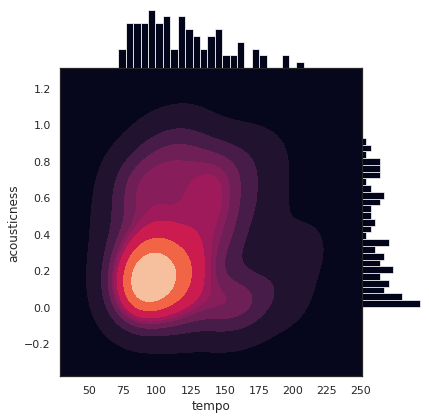

In [ ]:
sns.set_theme(style="white")
g = sns.JointGrid(data=our_final_df, x="tempo", y="acousticness", space=0)
g.plot_joint(sns.kdeplot,fill=True,cmap="rocket",thresh=-0.1)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

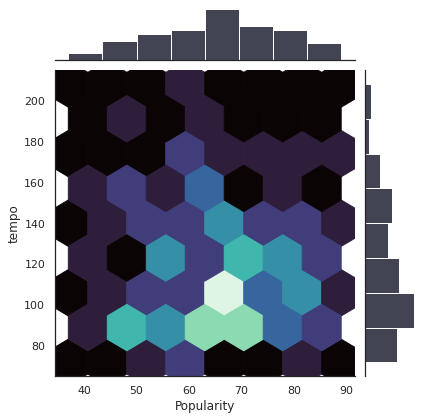

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="Popularity", y="tempo", data=our_final_df, kind='hex',cmap="mako",color="#03051A")

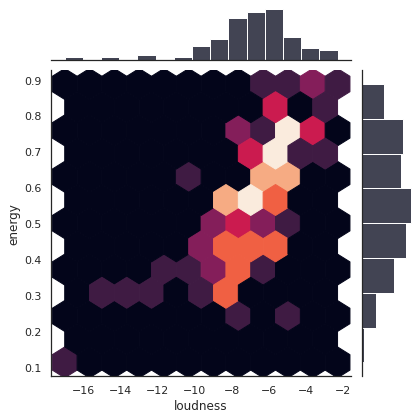

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="loudness", y="energy", data=our_final_df, kind='hex',cmap="rocket",color="#03051A")

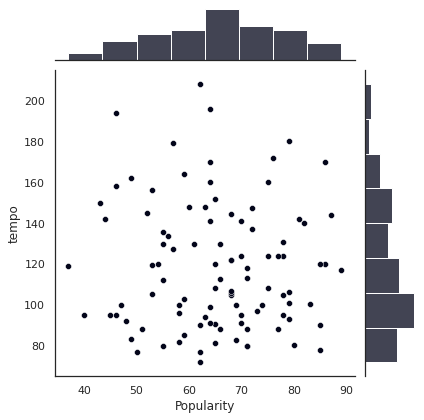

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="Popularity", y="tempo", data=our_final_df, kind='scatter',cmap="mako",color="#03051A")	

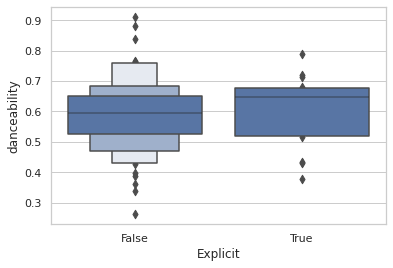

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.boxenplot(x="Explicit", y="danceability",
              color="b",
              scale="linear", data=our_final_df)

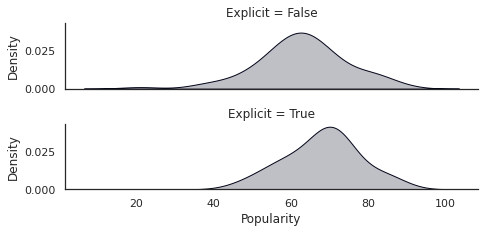

In [ ]:
ordered = our_final_df.Explicit.value_counts().index
g = sns.FacetGrid(our_final_df, row="Explicit", row_order=ordered,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "Popularity",fill=True,color="#03051A")

In [ ]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)

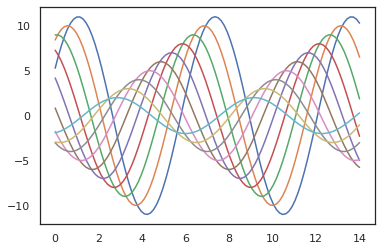

In [ ]:
sinplot()

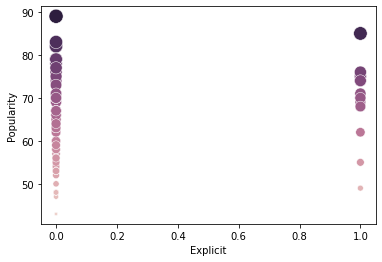

In [ ]:
sns.scatterplot(x = "Explicit", 
                y = "Popularity", 
                data = our_final_df, size='Popularity', hue='Popularity', sizes=(10,200), legend=False)

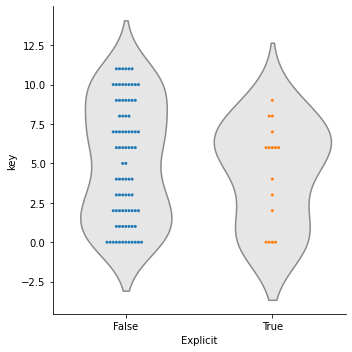

In [ ]:
sns.catplot(data=our_final_df, x="Explicit", y="key", kind="violin", color=".9", inner=None)
sns.swarmplot(data=our_final_df, x="Explicit", y="key", size=3)

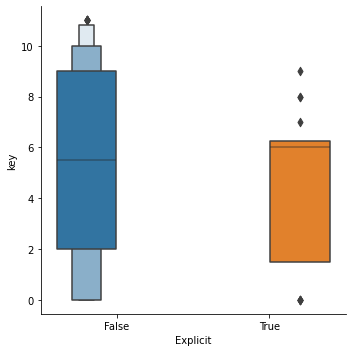

In [ ]:
sns.catplot(data=our_final_df, x="Explicit", y="key", hue="Explicit", kind="boxen")

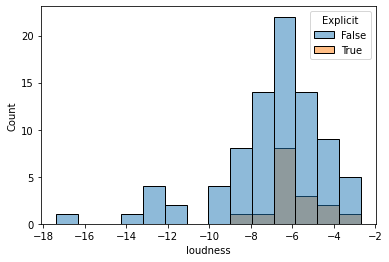

In [ ]:
sns.histplot(data=our_final_df, x="loudness", hue="Explicit")

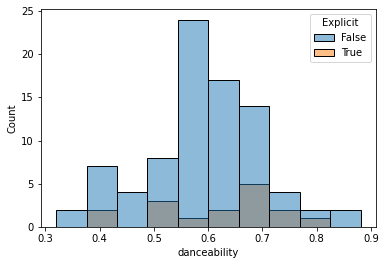

In [ ]:
sns.histplot(data=our_final_df, x="danceability", hue="Explicit")

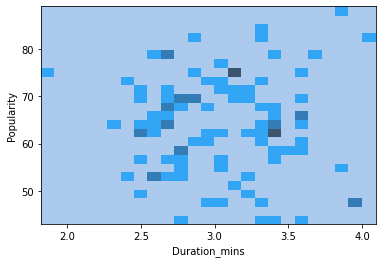

In [ ]:
sns.histplot(
    data=our_final_df, x="Duration_mins", y="Popularity",
    bins=25, discrete=(False, False), log_scale=(False, False), thresh=None,
)

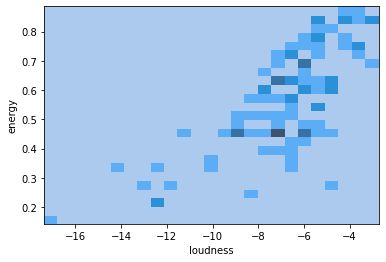

In [ ]:
sns.histplot(
    data=our_final_df, x="loudness", y="energy",
    bins=25, discrete=(False, False), log_scale=(False, False), thresh=None,
)

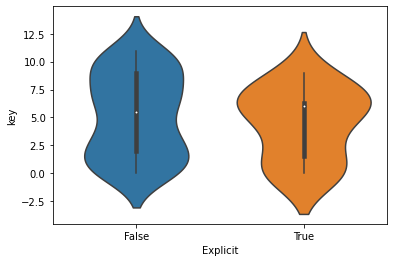

In [ ]:
sns.violinplot(x = "Explicit", y = "key", 
               data = our_final_df)

In [ ]:
find_prev_url = sp.search(q='href:' + '0bUTovzE275S4sfnJU1DMw')
find_prev_url['tracks']['href']

In [ ]:
sp.audio_features('0bUTovzE275S4sfnJU1DMw')

[{'danceability': 0.812,
  'energy': 0.615,
  'key': 8,
  'loudness': -9.646,
  'mode': 1,
  'speechiness': 0.413,
  'acousticness': 0.186,
  'instrumentalness': 0,
  'liveness': 0.141,
  'valence': 0.569,
  'tempo': 141.907,
  'type': 'audio_features',
  'id': '0bUTovzE275S4sfnJU1DMw',
  'uri': 'spotify:track:0bUTovzE275S4sfnJU1DMw',
  'track_href': 'https://api.spotify.com/v1/tracks/0bUTovzE275S4sfnJU1DMw',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0bUTovzE275S4sfnJU1DMw',
  'duration_ms': 122973,
  'time_signature': 4}]

In [ ]:
tracks_list = tracks['tracks']['items'] 
tracks = sp.search(q='spotify:track:0bUTovzE275S4sfnJU1DMw',type='track', limit=25)

In [ ]:
tracks = sp.search(q='track:' + '0bUTovzE275S4sfnJU1DMw', type='track') 
tracks

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3A0bUTovzE275S4sfnJU1DMw&type=track&offset=0&limit=10',
  'items': [],
  'limit': 10,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [ ]:
tracks['tracks']['items'][0]['preview_url']

'https://p.scdn.co/mp3-preview/38fc12a77916a43bea470d18bef6a3542f8e9fae?cid=a9c08768bf6f4d5083cdafbbf17c2277'

In [ ]:
def get_track_recommendations(seed_tracks,token):
    limit = 100
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [ ]:
track_id = '3j3XiRDNkaUfINMB99hphS'
json_response = get_track_recommendations(track_id,token)

In [ ]:
lst = []
for reccomended_songs in json_response['tracks']:
  print(f"{reccomended_songs['name']} || Author: {reccomended_songs['artists'][0]['name']}")
  lst.append(reccomended_songs)

Just A Lil Bit || Author: 50 Cent
Hero || Author: Skillet
My Time || Author: Fabolous
What If I Was White || Author: Sticky Fingaz
Scarface of Facebook || Author: Mads Veslelia
Do Or Die || Author: A-Connection
Majesty (with Labrinth & feat. Eminem) || Author: Nicki Minaj
No Church In The Wild || Author: JAY-Z
Scary Movies || Author: Bad Meets Evil
99 Problems BC - Rock Mix || Author: Body Count
From tha D Remix (feat. Eminem & Kid Rock) || Author: Trick Trick
Lose Yourself - From "8 Mile" Soundtrack || Author: Eminem
Spinnin || Author: Connor Price
We Ain't || Author: The Game
King Of The Jungle || Author: Vin Jay
Welcome 2 Hell || Author: Bad Meets Evil
Flexicution || Author: Logic
FUXK (feat. Ski Mask the Slump God) || Author: XXXTENTACION
Rap Nemesis || Author: Chris Webby
Step Back! || Author: 1nonly
Don't Push Me || Author: 50 Cent
Psychopath Killer || Author: Slaughterhouse
Welcome to Planet X (We're Coming for You) [with Eminem & The Observer] || Author: KXNG Crooked
Ready To G

In [ ]:
reccomendation_list = json_response['tracks']
print(len(reccomendation_list))

100


In [ ]:
reccomendation_list[0]

In [ ]:
recc_df = pd.DataFrame(reccomendation_list)

In [ ]:
recc_df

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,237706,True,{'isrc': 'USIR10500279'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nva9EpKntUT...,4nva9EpKntUTs6CRSGBCn9,False,Just A Lil Bit,78,None,14,track,spotify:track:4nva9EpKntUTs6CRSGBCn9
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AU, AZ, BA, BB, B...",1,186813,False,{'isrc': 'USAT20901852'},{'spotify': 'https://open.spotify.com/track/4C...,https://api.spotify.com/v1/tracks/4CbKVDZkYKdv...,4CbKVDZkYKdv69I4bCaKUq,False,Hero,72,https://p.scdn.co/mp3-preview/337b571b3da393ce...,1,track,spotify:track:4CbKVDZkYKdv69I4bCaKUq
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,240053,True,{'isrc': 'USUM70965810'},{'spotify': 'https://open.spotify.com/track/6V...,https://api.spotify.com/v1/tracks/6VD2YPeb1P3B...,6VD2YPeb1P3BCP5q0lZHrs,False,My Time,52,None,2,track,spotify:track:6VD2YPeb1P3BCP5q0lZHrs
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AU, BA, BD, BE, BG, BO, BR, CA, CH, C...",1,282280,False,{'isrc': 'USUR10001461'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pypjOgvF6cC...,7pypjOgvF6cCXnHBfmrnC2,False,What If I Was White,40,None,15,track,spotify:track:7pypjOgvF6cCXnHBfmrnC2
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,254519,True,{'isrc': 'NOMGU1401030'},{'spotify': 'https://open.spotify.com/track/1g...,https://api.spotify.com/v1/tracks/1gMFULX8hSzM...,1gMFULX8hSzM1NvbvivH3X,False,Scarface of Facebook,26,https://p.scdn.co/mp3-preview/51452a8708bf94f0...,1,track,spotify:track:1gMFULX8hSzM1NvbvivH3X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[GB, IE]",1,190066,True,{'isrc': 'USIR10211627'},{'spotify': 'https://open.spotify.com/track/64...,https://api.spotify.com/v1/tracks/64sHj6uM3jER...,64sHj6uM3jERhj2gilkBtJ,False,"Rabbit Run - From ""8 Mile"" Soundtrack",42,None,2,track,spotify:track:64sHj6uM3jERhj2gilkBtJ
96,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,248053,False,{'isrc': 'USUM71907048'},{'spotify': 'https://open.spotify.com/track/3o...,https://api.spotify.com/v1/tracks/3oLe5ZILASG8...,3oLe5ZILASG8vU5dxIMfLY,False,The Search,75,None,1,track,spotify:track:3oLe5ZILASG8vU5dxIMfLY
97,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AM, AT, AU, AZ, BE, BF, BG, BN, BW, BY, CH, C...",1,279040,False,{'isrc': 'FR5R00903246'},{'spotify': 'https://open.spotify.com/track/75...,https://api.spotify.com/v1/tracks/75Bju1SnpiBo...,75Bju1SnpiBoL1PLiVeOOb,False,I Don't Like (Remix),54,None,1,track,spotify:track:75Bju1SnpiBoL1PLiVeOOb
98,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,185586,False,{'isrc': 'USWB10300474'},{'spotify': 'https://open.spotify.com/track/2n...,https://api.spotify.com/v1/tracks/2nLtzopw4rPR...,2nLtzopw4rPReszdYBJU6h,False,Numb,83,https://p.scdn.co/mp3-preview/48dac3dd8990fbd8...,13,track,spotify:track:2nLtzopw4rPReszdYBJU6h


In [ ]:
recc_df2 = recc_df[['name','popularity','explicit','duration_ms']]

In [ ]:
recc_df2

,name,popularity,explicit,duration_ms
0,Just A Lil Bit,78,True,237706
1,Hero,72,False,186813
2,My Time,52,True,240053
3,What If I Was White,40,False,282280
4,Scarface of Facebook,26,True,254519
...,...,...,...,...
95,"Rabbit Run - From ""8 Mile"" Soundtrack",42,True,190066
96,The Search,75,False,248053
97,I Don't Like (Remix),54,False,279040
98,Numb,83,False,185586


In [ ]:
recc_df2.dtypes

name           object
popularity      int64
explicit         bool
duration_ms     int64
dtype: object

In [ ]:
corr = recc_df2.corr()
corr.style.background_gradient().set_precision(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,popularity,explicit,duration_ms
popularity,1.00000,-0.12654,-0.10735
explicit,-0.12654,1.00000,0.18936
duration_ms,-0.10735,0.18936,1.00000


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


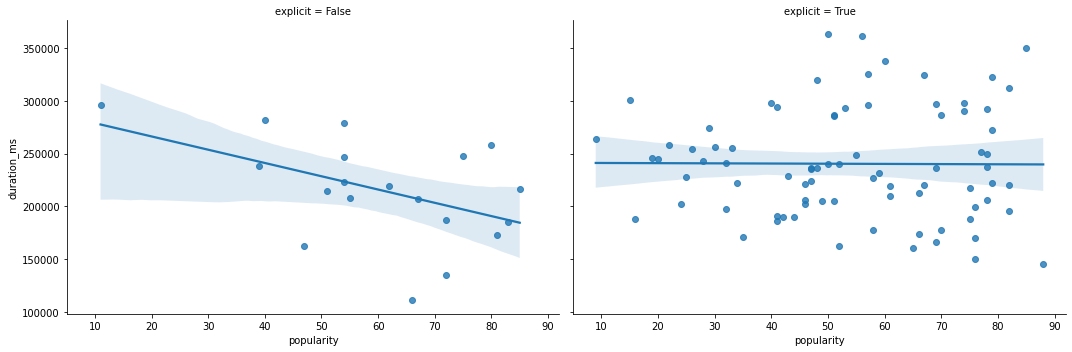

In [ ]:
sns.lmplot(x='popularity',y='duration_ms',data=recc_df2,col='explicit',palette='Set1', height=8, aspect=1.5, size=5)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


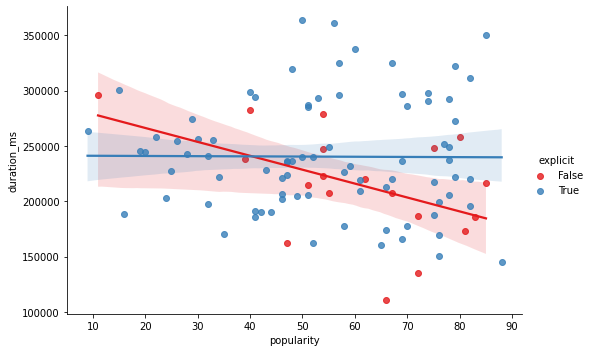

In [ ]:
sns.lmplot(x='popularity',y='duration_ms',data=recc_df2,hue='explicit',palette='Set1', height=8, aspect=1.5, size=5)

In [ ]:
recolist = json_response['tracks']
print(len(recolist))

18


In [ ]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"Yeah! (feat. Lil Jon & Ludacris)" by(Usher)
"asBESTos" by(Necro)
"Can't Be Touched (feat. Mr. Magic & Trouble)" by(Roy Jones Jr.)
"Nuttin' To Do" by(Bad Meets Evil)
"Heart Of A Warrior" by(Dizzee Rascal)
"Outcast" by(Cognito)
"Step Back!" by(1nonly)
"Scarface of Facebook" by(Mads Veslelia)
"Scary Movies" by(Bad Meets Evil)
"7 MILE BREAD" by(Calik Stillsik)
"0 To 100 / The Catch Up" by(Drake)
"Billie Jean 2005" by(Necro)
"Kill You" by(Eminem)
"Freestyle (feat. Eminem)" by(DJ Kay Slay)
"Homicide (feat. Eminem)" by(Logic)
"Go Hard, Go Home (feat. Giz, Swellz & Choppa)" by(Roy Jones Jr.)
"Vader" by(King Gordy)
"Throw It Up" by(Yelawolf)


In [ ]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,250373,False,{'isrc': 'USAR10301423'},{'spotify': 'https://open.spotify.com/track/5r...,https://api.spotify.com/v1/tracks/5rb9QrpfcKFH...,5rb9QrpfcKFHM1EUbSIurX,False,Yeah! (feat. Lil Jon & Ludacris),82,https://p.scdn.co/mp3-preview/775632d9867341c7...,2,track,spotify:track:5rb9QrpfcKFHM1EUbSIurX
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, CM, C...",1,245880,True,{'isrc': 'USZXT1028393'},{'spotify': 'https://open.spotify.com/track/19...,https://api.spotify.com/v1/tracks/19FR3ew4Mlbn...,19FR3ew4MlbnDpua5Gktxn,False,asBESTos,19,https://p.scdn.co/mp3-preview/9e2cba07c1f777ff...,1,track,spotify:track:19FR3ew4MlbnDpua5Gktxn
2,"{'album_type': 'COMPILATION', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,214400,True,{'isrc': 'TCABF1200656'},{'spotify': 'https://open.spotify.com/track/3z...,https://api.spotify.com/v1/tracks/3zmduBNsQ6BP...,3zmduBNsQ6BPDTZAkXzG5K,False,Can't Be Touched (feat. Mr. Magic & Trouble),73,https://p.scdn.co/mp3-preview/1d5cc27f2d206a6a...,2,track,spotify:track:3zmduBNsQ6BPDTZAkXzG5K
3,"{'album_type': 'COMPILATION', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,272826,False,{'isrc': 'USF430610001'},{'spotify': 'https://open.spotify.com/track/38...,https://api.spotify.com/v1/tracks/38IQJU3uJGM5...,38IQJU3uJGM55XrI84hlvs,False,Nuttin' To Do,34,https://p.scdn.co/mp3-preview/57da0e12ab94830c...,1,track,spotify:track:38IQJU3uJGM55XrI84hlvs
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,194466,True,{'isrc': 'GBUM71303420'},{'spotify': 'https://open.spotify.com/track/6X...,https://api.spotify.com/v1/tracks/6XUX2rq6SSLk...,6XUX2rq6SSLks9TiZRglFZ,False,Heart Of A Warrior,47,None,12,track,spotify:track:6XUX2rq6SSLks9TiZRglFZ
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,258386,True,{'isrc': 'USZXT1002363'},{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02JLtozAlHmH...,02JLtozAlHmHPBBXjigVBY,False,Outcast,22,https://p.scdn.co/mp3-preview/bc05b0602b1752a3...,3,track,spotify:track:02JLtozAlHmHPBBXjigVBY
6,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,150674,True,{'isrc': 'USWB12203894'},{'spotify': 'https://open.spotify.com/track/6j...,https://api.spotify.com/v1/tracks/6jdwbcH788tx...,6jdwbcH788txYS6Doy1F1j,False,Step Back!,76,https://p.scdn.co/mp3-preview/c6cd63c9b393a5e1...,1,track,spotify:track:6jdwbcH788txYS6Doy1F1j
7,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,254519,True,{'isrc': 'NOMGU1401030'},{'spotify': 'https://open.spotify.com/track/1g...,https://api.spotify.com/v1/tracks/1gMFULX8hSzM...,1gMFULX8hSzM1NvbvivH3X,False,Scarface of Facebook,26,https://p.scdn.co/mp3-preview/51452a8708bf94f0...,1,track,spotify:track:1gMFULX8hSzM1NvbvivH3X
8,"{'album_type': 'COMPILATION', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,228413,True,{'isrc': 'UK8D41406419'},{'spotify': 'https://open.spotify.com/track/6p...,https://api.spotify.com/v1/tracks/6poYzZkWE1DG...,6poYzZkWE1DGI714Ujxzm1,False,Scary Movies,43,None,3,track,spotify:track:6poYzZkWE1DGI714Ujxz

In [ ]:
reco_df = recommendation_result[['name', 'explicit', 'duration_ms', 'popularity']]

In [ ]:
reco_df

,name,explicit,duration_ms,popularity
0,Yeah! (feat. Lil Jon & Ludacris),False,250373,82
1,asBESTos,True,245880,19
2,Can't Be Touched (feat. Mr. Magic & Trouble),True,214400,73
3,Nuttin' To Do,False,272826,34
4,Heart Of A Warrior,True,194466,47
5,Outcast,True,258386,22
6,Step Back!,True,150674,76
7,Scarface of Facebook,True,254519,26
8,Scary Movies,True,228413,43
9,7 MILE BREAD,False,250070,13


In [ ]:
reco_df.describe()

,duration_ms,popularity
count,18.000000,18.000000
mean,240579.500000,47.555556
std,51215.503871,22.062004
min,106533.000000,13.000000
25%,221893.250000,30.250000
50%,250221.500000,44.500000
75%,270719.500000,69.750000
max,325333.000000,82.000000


In [ ]:
reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)
reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
reco_df

,name,explicit,duration_ms,popularity,duration_min,popularity_range
0,Yeah! (feat. Lil Jon & Ludacris),False,250373,82,250.0,70
1,asBESTos,True,245880,19,246.0,7
2,Can't Be Touched (feat. Mr. Magic & Trouble),True,214400,73,214.0,61
3,Nuttin' To Do,False,272826,34,273.0,22
4,Heart Of A Warrior,True,194466,47,194.0,35
5,Outcast,True,258386,22,258.0,10
6,Step Back!,True,150674,76,151.0,64
7,Scarface of Facebook,True,254519,26,255.0,14
8,Scary Movies,True,228413,43,228.0,31
9,7 MILE BREAD,False,250070,13,250.0,1


In [ ]:
track_data = sp.search(q='track:'+'Believer',type='track', limit=35)

In [ ]:
track_result = []
for i, item in enumerate(track_data['tracks']['items']):
    track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    track_result.append((i, track['artists'][0]['name'], track['name'], track_id, track_name, track['release_date'], popularity))

In [ ]:
track_result

In [ ]:
track_df = pd.DataFrame(track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity'))

In [ ]:
track_df

,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity
0,0,Imagine Dragons,Evolve,0pqnGHJpmpxLKifKRmU6WP,Believer,2017-06-23,88
1,1,Various Artists,Cleaning Music,1ZOTzqM3qF1mis1w4kI5x2,Believer,2022-10-27,0
2,2,Various Artists,Pop Trending Hot,0rfvxZivptsuLG9sYQmi6X,Believer,2022-10-28,0
3,3,The Monkees,More of The Monkees (Deluxe Edition),3G7tRC24Uh09Hmp1KZ7LQ2,I'm a Believer - 2006 Remaster,1967-01-09,74
4,4,The Monkees,"The Birds, The Bees, & The Monkees",7uEcCGtM1FBBGIhPozhJjv,Daydream Believer,1968-04-22,69
5,5,Smash Mouth,Smash Mouth,1RC5Mb0VhnlhnMlFDnrvE0,I'm A Believer - Radio Edit,2001-01-01,60
6,6,Imagine Dragons,Believer (feat. Lil Wayne),2sU9EjevkrU9OkPZudvFNN,Believer (feat. Lil Wayne),2019-01-07,64
7,7,Twenty One Pilots,Twenty One Pilots,3FvV3j98xtcylQF1drDc9j,Oh Ms Believer,2009-12-29,60
8,8,Various Artists,Shrek,0mBL2JwjNYKtdFacHxvtJt,"I'm A Believer - From ""Shrek"" Motion Picture S...",2001-01-01,57
9,9,The Bouncing Souls,How I Spent My Summer Vacation,4fRmFVMd0c1SGfzazBJIM8,True Believers,2001-05-22,55


In [ ]:
features_df = pd.DataFrame()
for id in track_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

In [ ]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.776,0.780,10,-4.374,0,0.1280,0.062200,0.000000,0.0810,0.6660,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
0,0.766,0.775,10,-4.267,0,0.1410,0.050400,0.000000,0.1280,0.6950,124.751,audio_features,1ZOTzqM3qF1mis1w4kI5x2,spotify:track:1ZOTzqM3qF1mis1w4kI5x2,https://api.spotify.com/v1/tracks/1ZOTzqM3qF1m...,https://api.spotify.com/v1/audio-analysis/1ZOT...,204347,4
0,0.766,0.775,10,-4.267,0,0.1410,0.050400,0.000000,0.1280,0.6950,124.751,audio_features,0rfvxZivptsuLG9sYQmi6X,spotify:track:0rfvxZivptsuLG9sYQmi6X,https://api.spotify.com/v1/tracks/0rfvxZivptsu...,https://api.spotify.com/v1/audio-analysis/0rfv...,204347,4
0,0.526,0.775,0,-6.050,1,0.0352,0.707000,0.000021,0.2170,0.9620,80.106,audio_features,3G7tRC24Uh09Hmp1KZ7LQ2,spotify:track:3G7tRC24Uh09Hmp1KZ7LQ2,https://api.spotify.com/v1/tracks/3G7tRC24Uh09...,https://api.spotify.com/v1/audio-analysis/3G7t...,167373,4
0,0.510,0.488,7,-10.304,1,0.0304,0.256000,0.000000,0.1100,0.6490,125.683,audio_features,7uEcCGtM1FBBGIhPozhJjv,spotify:track:7uEcCGtM1FBBGIhPozhJjv,https://api.spotify.com/v1/tracks/7uEcCGtM1FBB...,https://api.spotify.com/v1/audio-analysis/7uEc...,179613,4
0,0.559,0.972,6,-3.524,1,0.0639,0.019800,0.000006,0.3930,0.9190,82.336,audio_features,1RC5Mb0VhnlhnMlFDnrvE0,spotify:track:1RC5Mb0VhnlhnMlFDnrvE0,https://api.spotify.com/v1/tracks/1RC5Mb0Vhnlh...,https://api.spotify.com/v1/audio-analysis/1RC5...,183400,4
0,0.487,0.838,10,-4.319,0,0.2550,0.058000,0.000000,0.0645,0.7620,93.701,audio_features,2sU9EjevkrU9OkPZudvFNN,spotify:track:2sU9EjevkrU9OkPZudvFNN,https://api.spotify.com/v1/tracks/2sU9EjevkrU9...,https://api.spotify.com/v1/audio-analysis/2sU9...,219705,3
0,0.501,0.328,0,-8.329,1,0.0255,0.612000,0.000000,0.1500,0.2630,73.326,audio_features,3FvV3j98xtcylQF1drDc9j,spotify:track:3FvV3j98xtcylQF1drDc9j,https://api.spotify.com/v1/tracks/3FvV3j98xtcy...,https://api.spotify.com/v1/audio-analysis/3FvV...,217000,4
0,0.515,0.980,6,-2.410,1,0.0701,0.016700,0.000000,0.2580,0.9330,164.698,audio_features,0mBL2JwjNYKtdFacHxvtJt,spotify:track:0mBL2JwjNYKtdFacHxvtJt,https://api.spotify.com/v1/tracks/0mBL2JwjNYKt...,https://api.spotify.com/v1/audio-analysis/0mBL...,185760,4
0,0.237,0.981,0,-4.320,1,0.0989,0.000296,0.000038,0.2020,0.4750,98.181,audio_features,4fRmFVMd0c1SGfzazBJIM8,spotify:track:4fRmFVMd0c1SGfzazBJIM8,https://api.spotify.com/v1/tracks/4fRmFVMd0c1S...,https://api.spotify.com/v1/audio-analysis/4fRm...,150293,4


In [ ]:
final_df = track_df.merge(features_df, left_on="Id", right_on="id")

In [ ]:
final_df

,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Imagine Dragons,Evolve,0pqnGHJpmpxLKifKRmU6WP,Believer,2017-06-23,88,0.776,0.780,10,...,0.0810,0.6660,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
1,1,Various Artists,Cleaning Music,1ZOTzqM3qF1mis1w4kI5x2,Believer,2022-10-27,0,0.766,0.775,10,...,0.1280,0.6950,124.751,audio_features,1ZOTzqM3qF1mis1w4kI5x2,spotify:track:1ZOTzqM3qF1mis1w4kI5x2,https://api.spotify.com/v1/tracks/1ZOTzqM3qF1m...,https://api.spotify.com/v1/audio-analysis/1ZOT...,204347,4
2,2,Various Artists,Pop Trending Hot,0rfvxZivptsuLG9sYQmi6X,Believer,2022-10-28,0,0.766,0.775,10,...,0.1280,0.6950,124.751,audio_features,0rfvxZivptsuLG9sYQmi6X,spotify:track:0rfvxZivptsuLG9sYQmi6X,https://api.spotify.com/v1/tracks/0rfvxZivptsu...,https://api.spotify.com/v1/audio-analysis/0rfv...,204347,4
3,3,The Monkees,More of The Monkees (Deluxe Edition),3G7tRC24Uh09Hmp1KZ7LQ2,I'm a Believer - 2006 Remaster,1967-01-09,74,0.526,0.775,0,...,0.2170,0.9620,80.106,audio_features,3G7tRC24Uh09Hmp1KZ7LQ2,spotify:track:3G7tRC24Uh09Hmp1KZ7LQ2,https://api.spotify.com/v1/tracks/3G7tRC24Uh09...,https://api.spotify.com/v1/audio-analysis/3G7t...,167373,4
4,4,The Monkees,"The Birds, The Bees, & The Monkees",7uEcCGtM1FBBGIhPozhJjv,Daydream Believer,1968-04-22,69,0.510,0.488,7,...,0.1100,0.6490,125.683,audio_features,7uEcCGtM1FBBGIhPozhJjv,spotify:track:7uEcCGtM1FBBGIhPozhJjv,https://api.spotify.com/v1/tracks/7uEcCGtM1FBB...,https://api.spotify.com/v1/audio-analysis/7uEc...,179613,4
5,5,Smash Mouth,Smash Mouth,1RC5Mb0VhnlhnMlFDnrvE0,I'm A Believer - Radio Edit,2001-01-01,60,0.559,0.972,6,...,0.3930,0.9190,82.336,audio_features,1RC5Mb0VhnlhnMlFDnrvE0,spotify:track:1RC5Mb0VhnlhnMlFDnrvE0,https://api.spotify.com/v1/tracks/1RC5Mb0Vhnlh...,https://api.spotify.com/v1/audio-analysis/1RC5...,183400,4
6,6,Imagine Dragons,Believer (feat. Lil Wayne),2sU9EjevkrU9OkPZudvFNN,Believer (feat. Lil Wayne),2019-01-07,64,0.487,0.838,10,...,0.0645,0.7620,93.701,audio_features,2sU9EjevkrU9OkPZudvFNN,spotify:track:2sU9EjevkrU9OkPZudvFNN,https://api.spotify.com/v1/tracks/2sU9EjevkrU9...,https://api.spotify.com/v1/audio-analysis/2sU9...,219705,3
7,7,Twenty One Pilots,Twenty One Pilots,3FvV3j98xtcylQF1drDc9j,Oh Ms Believer,2009-12-29,60,0.501,0.328,0,...,0.1500,0.2630,73.326,audio_features,3FvV3j98xtcylQF1drDc9j,spotify:track:3FvV3j98xtcylQF1drDc9j,https://api.spotify.com/v1/tracks/3FvV3j98xtcy...,https://api.spotify.com/v1/audio-analysis/3FvV...,217000,4
8,8,Various Artists,Shrek,0mBL2JwjNYKtdFacHxvtJt,"I'm A Believer - From ""Shrek"" Motion Picture S...",2001-01-01,57,0.515,0.980,6,...,0.2580,0.9330,164.698,audio_features,0mBL2JwjNYKtdFacHxvtJt,spotify:track:0mBL2JwjNYKtdFacHxvtJt,https://api.spotify.com/v1/tracks/0mBL2JwjNYKt...,https://api.spotify.com/v1/audio-analysis/0mBL...,185760,4
9,9,The Bouncing Souls,How I Spent My Summer Vacation,4fRmFVMd0c1SGfzazBJIM8,True Believers,2001-05-22,55,0.237,0.981,0,...,0.2020,0.4750,98.181,audio_features,4fRmFVMd0c1SGfzazBJIM8,spotify:track:4fRmFVMd0c1SGfzazBJIM8,https://api.spotify.com/v1/tracks/4fRmFVMd0c1S...,https://api.spotify.com/v1/audio-analysis/4fRm...,150293,4


In [ ]:
feature_name = "liveness"
final_df_sorted = final_df.sort_values(by=['Popularity'], ascending=False)
df_plot = final_df_sorted[['Artist', 'Album Name', 'Song Name', 'Release Date', 'Popularity', f'{feature_name}']]

In [ ]:
df_plot

,Artist,Album Name,Song Name,Release Date,Popularity,liveness
0,Imagine Dragons,Evolve,Believer,2017-06-23,88,0.0810
3,The Monkees,More of The Monkees (Deluxe Edition),I'm a Believer - 2006 Remaster,1967-01-09,74,0.2170
4,The Monkees,"The Birds, The Bees, & The Monkees",Daydream Believer,1968-04-22,69,0.1100
6,Imagine Dragons,Believer (feat. Lil Wayne),Believer (feat. Lil Wayne),2019-01-07,64,0.0645
16,Alan Walker,Believers,Believers,2021-05-14,61,0.1610
10,Imagine Dragons,Believer (Kaskade Remix),Believer - Kaskade Remix,2017-06-09,61,0.1180
5,Smash Mouth,Smash Mouth,I'm A Believer - Radio Edit,2001-01-01,60,0.3930
7,Twenty One Pilots,Twenty One Pilots,Oh Ms Believer,2009-12-29,60,0.1500
11,The Monkees,The Best of The Monkees,I'm a Believer,2003,57,0.1990
8,Various Artists,Shrek,"I'm A Believer - From ""Shrek"" Motion Picture S...",2001-01-01,57,0.2580


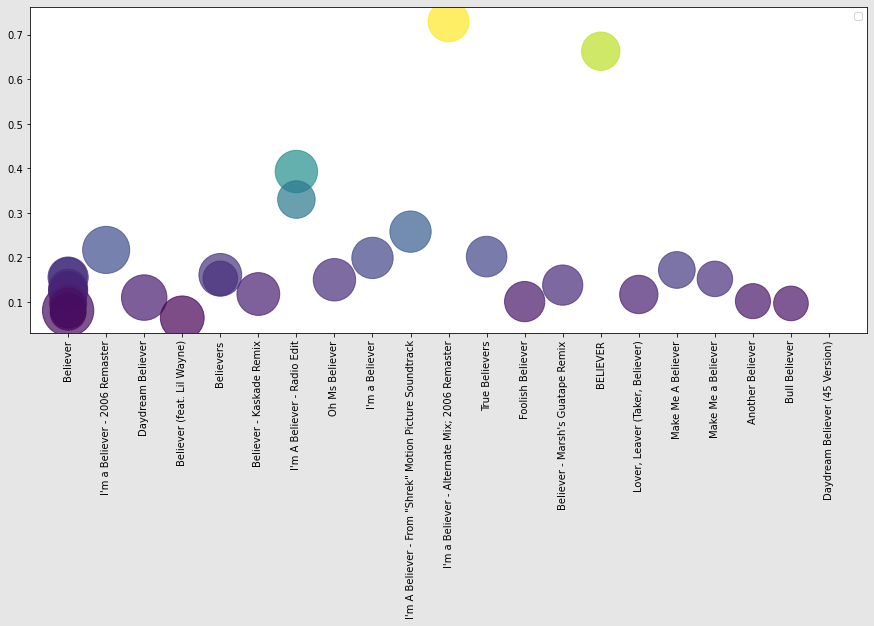

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))
    
x = df_plot['Song Name']
y = df_plot[feature_name]
s = df_plot['Popularity']*30

plt.scatter(x, y, s, alpha=0.7, c=df_plot[feature_name])
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()

In [ ]:
artist_name = 'shawn mendes'
artists = sp.search(q='artist:'+artist_name,type='artist', limit=10)

In [ ]:
artists

{'artists': {'href': 'https://api.spotify.com/v1/search?query=artist%3Ashawn+mendes&type=artist&offset=0&limit=10',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7n2wHs1TKAczGzO7Dd2rGr'},
    'followers': {'href': None, 'total': 39609100},
    'genres': ['canadian pop', 'dance pop', 'pop', 'viral pop'],
    'href': 'https://api.spotify.com/v1/artists/7n2wHs1TKAczGzO7Dd2rGr',
    'id': '7n2wHs1TKAczGzO7Dd2rGr',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb46e7a06fa6dfefaed6a3f0db',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab6761610000517446e7a06fa6dfefaed6a3f0db',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f17846e7a06fa6dfefaed6a3f0db',
      'width': 160}],
    'name': 'Shawn Mendes',
    'popularity': 84,
    'type': 'artist',
    'uri': 'spotify:artist:7n2wHs1TKAczGzO7Dd2rGr'},
   {'external_urls': {'spotify': 'https://open.spoti

In [ ]:
artist_uri = artists['artists']['items'][0]['uri']
results = sp.artist_top_tracks(artist_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    if track['preview_url'] is not None:
        print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : There's Nothing Holdin' Me Back
cover art: https://i.scdn.co/image/ab67616d0000b273ea3ef7697cfd5705b8f47521

track    : Treat You Better
cover art: https://i.scdn.co/image/ab67616d0000b2731376b4b16f4bfcba02dc571b

track    : Mercy
cover art: https://i.scdn.co/image/ab67616d0000b273ea3ef7697cfd5705b8f47521

track    : When You're Gone
cover art: https://i.scdn.co/image/ab67616d0000b273dad0775943c1a826bfed3117

track    : Summer of Love (Shawn Mendes & Tainy)
cover art: https://i.scdn.co/image/ab67616d0000b273a111c87c210cc9bff93948bd

track    : Señorita
cover art: https://i.scdn.co/image/ab67616d0000b273c820f033bd82bef4355d1563

track    : Stitches
cover art: https://i.scdn.co/image/ab67616d0000b273d26246b23c8bfa8ce543b3bb

track    : It'll Be Okay
cover art: https://i.scdn.co/image/ab67616d0000b27372355b30dde4b6ded10ef48c

track    : KESI - Remix
audio    : https://p.scdn.co/mp3-preview/c93653b9309af7439422a3e620a242145a5ec8ea?cid=a9c08768bf6f4d5083cdafbbf17c2277
cover art: 

In [ ]:
track_result = []
for i, item in enumerate(results['tracks']):
#     track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    track_result.append((i, artist_name, track['name'], track_id, track_name, item['album']['release_date'], popularity))

In [ ]:
track_result

[(0,
  'shawn mendes',
  'In My Blood',
  '7JJmb5XwzOO8jgpou264Ml',
  "There's Nothing Holdin' Me Back",
  '2017-04-20',
  86),
 (1,
  'shawn mendes',
  'In My Blood',
  '3QGsuHI8jO1Rx4JWLUh9jd',
  'Treat You Better',
  '2017-04-20',
  84),
 (2,
  'shawn mendes',
  'In My Blood',
  '0AS63m1wHv9n4VVRizK6Hc',
  'Mercy',
  '2017-04-20',
  81),
 (3,
  'shawn mendes',
  'In My Blood',
  '0U1W2LZVUX7qTm7dDpqxh6',
  "When You're Gone",
  '2022-03-31',
  81),
 (4,
  'shawn mendes',
  'In My Blood',
  '0z8hI3OPS8ADPWtoCjjLl6',
  'Summer of Love (Shawn Mendes & Tainy)',
  '2021-08-20',
  81),
 (5,
  'shawn mendes',
  'In My Blood',
  '6v3KW9xbzN5yKLt9YKDYA2',
  'Señorita',
  '2019-06-19',
  80),
 (6,
  'shawn mendes',
  'In My Blood',
  '5jsw9uXEGuKyJzs0boZ1bT',
  'Stitches',
  '2015-04-14',
  75),
 (7,
  'shawn mendes',
  'In My Blood',
  '2KnLkZ3z7PO3kgVGHGqDpD',
  "It'll Be Okay",
  '2021-12-01',
  79),
 (8,
  'shawn mendes',
  'In My Blood',
  '0IqCoZ168iRc9LqfrYgpZy',
  'KESI - Remix',
  '2

In [ ]:
track_df = pd.DataFrame(track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity'))

In [ ]:
features_df = pd.DataFrame()
for id in track_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

In [ ]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.866,0.813,11,-4.063,0,0.0554,0.3800,0.000000,0.0779,0.9690,121.998,audio_features,7JJmb5XwzOO8jgpou264Ml,spotify:track:7JJmb5XwzOO8jgpou264Ml,https://api.spotify.com/v1/tracks/7JJmb5XwzOO8...,https://api.spotify.com/v1/audio-analysis/7JJm...,199440,4
0,0.444,0.819,10,-4.078,0,0.3410,0.1060,0.000000,0.1070,0.7470,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4
0,0.555,0.662,11,-4.952,0,0.0827,0.1250,0.000000,0.1110,0.3560,148.128,audio_features,0AS63m1wHv9n4VVRizK6Hc,spotify:track:0AS63m1wHv9n4VVRizK6Hc,https://api.spotify.com/v1/tracks/0AS63m1wHv9n...,https://api.spotify.com/v1/audio-analysis/0AS6...,208733,4
0,0.603,0.691,5,-5.805,1,0.0372,0.0248,0.000000,0.5830,0.5770,147.148,audio_features,0U1W2LZVUX7qTm7dDpqxh6,spotify:track:0U1W2LZVUX7qTm7dDpqxh6,https://api.spotify.com/v1/tracks/0U1W2LZVUX7q...,https://api.spotify.com/v1/audio-analysis/0U1W...,172267,4
0,0.776,0.808,11,-4.501,1,0.1170,0.0297,0.000127,0.1030,0.4940,123.988,audio_features,0z8hI3OPS8ADPWtoCjjLl6,spotify:track:0z8hI3OPS8ADPWtoCjjLl6,https://api.spotify.com/v1/tracks/0z8hI3OPS8AD...,https://api.spotify.com/v1/audio-analysis/0z8h...,184104,4
0,0.759,0.548,9,-6.049,0,0.0290,0.0392,0.000000,0.0828,0.7490,116.967,audio_features,6v3KW9xbzN5yKLt9YKDYA2,spotify:track:6v3KW9xbzN5yKLt9YKDYA2,https://api.spotify.com/v1/tracks/6v3KW9xbzN5y...,https://api.spotify.com/v1/audio-analysis/6v3K...,190800,4
0,0.752,0.754,1,-6.684,1,0.0615,0.0151,0.000000,0.0486,0.7550,149.789,audio_features,5jsw9uXEGuKyJzs0boZ1bT,spotify:track:5jsw9uXEGuKyJzs0boZ1bT,https://api.spotify.com/v1/tracks/5jsw9uXEGuKy...,https://api.spotify.com/v1/audio-analysis/5jsw...,206880,4
0,0.398,0.286,7,-11.881,1,0.0330,0.6160,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,222800,4
0,0.871,0.815,4,-4.439,1,0.0477,0.1270,0.000006,0.0940,0.8230,122.959,audio_features,0IqCoZ168iRc9LqfrYgpZy,spotify:track:0IqCoZ168iRc9LqfrYgpZy,https://api.spotify.com/v1/tracks/0IqCoZ168iRc...,https://api.spotify.com/v1/audio-analysis/0IqC...,176575,4
0,0.622,0.712,5,-7.321,1,0.0660,0.0573,0.000000,0.1300,0.4870,140.025,audio_features,2QZ7WLBE8h2y1Y5Fb8RYbH,spotify:track:2QZ7WLBE8h2y1Y5Fb8RYbH,https://api.spotify.com/v1/tracks/2QZ7WLBE8h2y...,https://api.spotify.com/v1/audio-analysis/2QZ7...,211360,4


In [ ]:
final_df = track_df.merge(features_df, left_on="Id", right_on="id")

In [ ]:
final_df

,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,shawn mendes,In My Blood,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,2017-04-20,86,0.866,0.813,11,...,0.0779,0.9690,121.998,audio_features,7JJmb5XwzOO8jgpou264Ml,spotify:track:7JJmb5XwzOO8jgpou264Ml,https://api.spotify.com/v1/tracks/7JJmb5XwzOO8...,https://api.spotify.com/v1/audio-analysis/7JJm...,199440,4
1,1,shawn mendes,In My Blood,3QGsuHI8jO1Rx4JWLUh9jd,Treat You Better,2017-04-20,84,0.444,0.819,10,...,0.1070,0.7470,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4
2,2,shawn mendes,In My Blood,0AS63m1wHv9n4VVRizK6Hc,Mercy,2017-04-20,81,0.555,0.662,11,...,0.1110,0.3560,148.128,audio_features,0AS63m1wHv9n4VVRizK6Hc,spotify:track:0AS63m1wHv9n4VVRizK6Hc,https://api.spotify.com/v1/tracks/0AS63m1wHv9n...,https://api.spotify.com/v1/audio-analysis/0AS6...,208733,4
3,3,shawn mendes,In My Blood,0U1W2LZVUX7qTm7dDpqxh6,When You're Gone,2022-03-31,81,0.603,0.691,5,...,0.5830,0.5770,147.148,audio_features,0U1W2LZVUX7qTm7dDpqxh6,spotify:track:0U1W2LZVUX7qTm7dDpqxh6,https://api.spotify.com/v1/tracks/0U1W2LZVUX7q...,https://api.spotify.com/v1/audio-analysis/0U1W...,172267,4
4,4,shawn mendes,In My Blood,0z8hI3OPS8ADPWtoCjjLl6,Summer of Love (Shawn Mendes & Tainy),2021-08-20,81,0.776,0.808,11,...,0.1030,0.4940,123.988,audio_features,0z8hI3OPS8ADPWtoCjjLl6,spotify:track:0z8hI3OPS8ADPWtoCjjLl6,https://api.spotify.com/v1/tracks/0z8hI3OPS8AD...,https://api.spotify.com/v1/audio-analysis/0z8h...,184104,4
5,5,shawn mendes,In My Blood,6v3KW9xbzN5yKLt9YKDYA2,Señorita,2019-06-19,80,0.759,0.548,9,...,0.0828,0.7490,116.967,audio_features,6v3KW9xbzN5yKLt9YKDYA2,spotify:track:6v3KW9xbzN5yKLt9YKDYA2,https://api.spotify.com/v1/tracks/6v3KW9xbzN5y...,https://api.spotify.com/v1/audio-analysis/6v3K...,190800,4
6,6,shawn mendes,In My Blood,5jsw9uXEGuKyJzs0boZ1bT,Stitches,2015-04-14,75,0.752,0.754,1,...,0.0486,0.7550,149.789,audio_features,5jsw9uXEGuKyJzs0boZ1bT,spotify:track:5jsw9uXEGuKyJzs0boZ1bT,https://api.spotify.com/v1/tracks/5jsw9uXEGuKy...,https://api.spotify.com/v1/audio-analysis/5jsw...,206880,4
7,7,shawn mendes,In My Blood,2KnLkZ3z7PO3kgVGHGqDpD,It'll Be Okay,2021-12-01,79,0.398,0.286,7,...,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,222800,4
8,8,shawn mendes,In My Blood,0IqCoZ168iRc9LqfrYgpZy,KESI - Remix,2021-07-14,75,0.871,0.815,4,...,0.0940,0.8230,122.959,audio_features,0IqCoZ168iRc9LqfrYgpZy,spotify:track:0IqCoZ168iRc9LqfrYgpZy,https://api.spotify.com/v1/tracks/0IqCoZ168iRc...,https://api.spotify.com/v1/audio-analysis/0IqC...,176575,4
9,9,shawn mendes,In My Blood,2QZ7WLBE8h2y1Y5Fb8RYbH,In My Blood,2018-05-25,75,0.622,0.712,5,...,0.1300,0.4870,140.025,audio_features,2QZ7WLBE8h2y1Y5Fb8RYbH,spotify:track:2QZ7WLBE8h2y1Y5Fb8RYbH,https://api.spotify.com/v1/tracks/2QZ7WLBE8h2y...,https://api.spotify.com/v1/audio-analysis/2QZ7...,211360,4
